In [40]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


In [41]:
#Importamos la base de datos
df = pd.read_csv(r'C:\Users\juanc\Desktop\proyecto ML\proyecto machine learning\3-Machine-Learning\Entregas\ML_project\salaries _2.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
16490,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
16491,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
16492,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## **Análisis exploratorio de los datos**

In [42]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


In [43]:
df.info()
#No hay ningun NAN. 
#Para el analisis posterior sera necesario pasar alguna columna de obj a numerica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [44]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


***Eliminamos las columnas que no nos hagan falta***


In [45]:
df = df.drop(columns=['salary_currency', 'salary',"employee_residence", "work_year", "remote_ratio","employment_type"])
#la columna salary_currency, salary y salary_in_usd dice lo mismo asi que me quedo unicamente con salary_in_usd

### **Pasamos las columnas de type object a int, antes de esto analizamos cada columna si tiene mas sentido pasarlo a binario o continua**

#### 1. Columna Experiencie_level

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

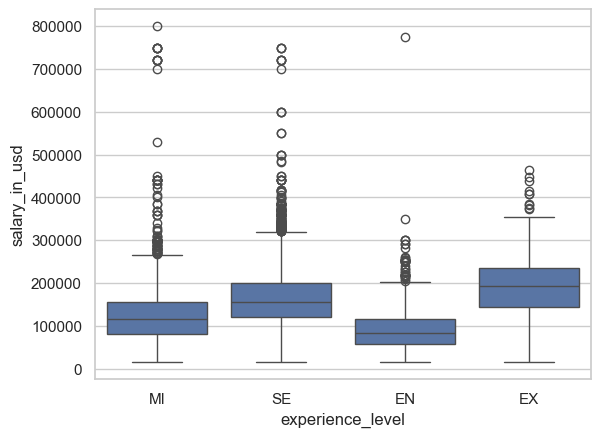

In [46]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
#en=entry, mi=middle, se=senior, ex=Executive-level / Director
#vemos que a mayor experiencia mayor sueldo por lo que tiene sentido pasarlo a una variable continua

In [47]:
df.head()

,experience_level,job_title,salary_in_usd,company_location,company_size
0,MI,Data Scientist,120000,AU,S
1,MI,Data Scientist,70000,AU,S
2,MI,Data Scientist,130000,US,M
3,MI,Data Scientist,110000,US,M
4,MI,Data Science Manager,240000,US,M


In [48]:
# Pasar la columna de str a int
df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})

C:\Users\juanc\AppData\Local\Temp\ipykernel_13408\3770702301.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['experience_level'] = df['experience_level'].replace({'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4})


#### 2. Columna Company_location

In [49]:
company_location_counts =df['company_location'].value_counts()
# Identificar los paises que aparecen menos de 30 veces
company_location_remove = company_location_counts[company_location_counts < 30].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['company_location'].isin(company_location_remove)]
#solo nos quedamos las que almenos sean 30
#us esta sobrepresentado hay que disminuirlo
company_location_counts

company_location
US    14478
GB      694
CA      455
ES      133
DE      105
      ...  
AM        1
QA        1
AD        1
EC        1
MD        1
Name: count, Length: 77, dtype: int64

In [50]:
# Selecciona todas las filas de la clase "US"
us_rows = df[df['company_location'] == 'US']

# Si hay más de 2000 filas de la clase "US", submuestrea aleatoriamente 2000 filas
if len(us_rows) > 2000:
    us_sampled_rows = us_rows.sample(n=2000, random_state=42)
else:
    us_sampled_rows = us_rows

# Selecciona todas las filas que no son de la clase "US"
non_us_rows = df[df['company_location'] != 'US']

# Combina las filas submuestreadas de la clase "US" con las filas que no son de la clase "US"
df = pd.concat([us_sampled_rows, non_us_rows])


In [51]:
df.groupby('company_location').mean('salary_in_usd')
#vemos que paises tienen un salario medio similar para agruparlos a la hora de pasarlo a numerico para meterlo en los modelos


,experience_level,salary_in_usd
company_location,,
AU,2.000000,127800.701754
CA,2.661538,145918.096703
DE,2.142857,94098.514286
ES,2.631579,56342.503759
FR,2.138462,87970.015385
GB,2.311239,93228.488473
IN,2.158730,42726.396825
NL,2.031250,75759.937500
US,2.684000,156538.816500


<Axes: xlabel='company_location', ylabel='salary_in_usd'>

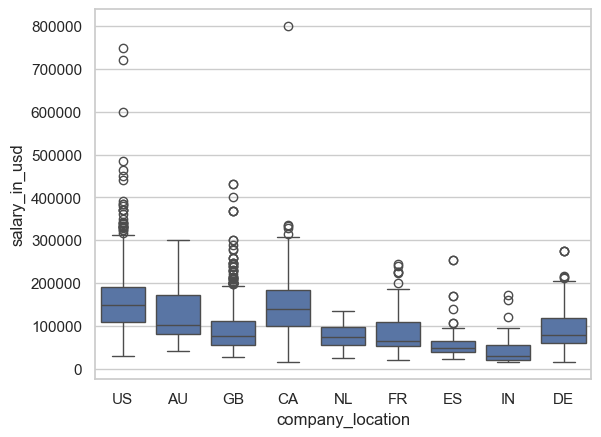

In [52]:
sns.boxplot(x='company_location', y='salary_in_usd', data=df)

In [53]:
# Crear un diccionario de mapeo
location_mapping = {
    'ES': 1,
    'IN': 1,
    'DE': 2,
    'FR': 2,
    'NL': 2,
    'GB': 2,
    'US': 3,
    'AU': 3,
    'CA': 3
}

# Crear la nueva columna 'riqueza_paises' usando el diccionario de mapeo
df['company_location'] = df['company_location'].map(location_mapping)
df



,experience_level,job_title,salary_in_usd,company_location,company_size
13812,3,Data Engineer,139500,3,M
9280,2,Data Analyst,78000,3,M
1984,1,Data Analyst,64000,3,M
7911,3,Applied Scientist,222200,3,L
6745,2,Data Science,115000,3,L
...,...,...,...,...,...
16467,2,Data Scientist,38776,1,M
16468,2,Data Scientist,46809,1,M
16474,2,Lead Data Analyst,19609,1,L
16478,2,Data Engineer,45391,2,L


#### 3. Columna Employment_type

#### 4. Columna Job_title

In [54]:
job_title_counts = df['job_title'].value_counts()
#Considero que todos los trabajos en los que tenga menos de 50 personas no hay data suficiente y el resultado puede estar muy sesgado por el azar por lo que los elimino

In [55]:
# Identificar los trabajos que aparecen menos de 50 veces
job_title_remove = job_title_counts[job_title_counts < 50].index

# Eliminar las filas correspondientes a estos países, ya que estos son demasiados excasos para ser representativos
df = df[~df['job_title'].isin(job_title_remove)]

In [56]:
df['job_title'].value_counts()
#las que tienen 50-100 counts no las eliminamos porque vemos que muchas son puestos de manager/jefe por lo que tiene sentido que haya menos pero esa informacion nos es relevante mantenerla

job_title
Data Scientist                   755
Data Engineer                    743
Data Analyst                     528
Machine Learning Engineer        368
Analytics Engineer               110
Research Scientist               101
Data Architect                    94
Business Intelligence Analyst     59
Applied Scientist                 57
Data Science                      55
Name: count, dtype: int64

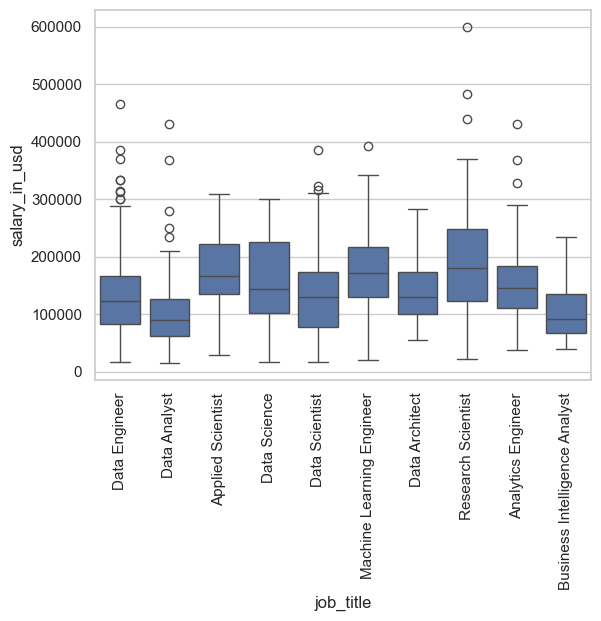

In [57]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid")

# Crea el gráfico de caja
sns.boxplot(x='job_title', y='salary_in_usd', data=df)

# Rota los nombres del eje x en vertical
plt.xticks(rotation=90)

# Muestra el gráfico
plt.show()



In [58]:
df.groupby('job_title').mean('salary_in_usd')

,experience_level,salary_in_usd,company_location
job_title,,,
Analytics Engineer,2.754545,154354.963636,2.681818
Applied Scientist,2.771930,183156.912281,3.000000
Business Intelligence Analyst,2.271186,105533.542373,2.779661
Data Analyst,2.240530,97053.827652,2.623106
Data Architect,2.978723,138372.968085,2.787234
Data Engineer,2.588156,130022.292059,2.643338
Data Science,2.618182,158621.000000,2.818182
Data Scientist,2.600000,130564.899338,2.586755
Machine Learning Engineer,2.720109,173886.394022,2.760870


In [59]:
# Crear un diccionario de mapeo
job_mapping = {
    'Business Intelligence Analyst': 1,
    'Data Analyst': 1,
    'Data Architect': 2,
    'Data Engineer': 2,
    'Data Scientist': 2,
    'Analytics Engineer': 3,
    'Data Science': 3,
    'Applied Scientist': 4,
    'Machine Learning Engineer': 4,
    'Research Scientist': 4
}

# Crear la nueva columna 'riqueza_paises' usando el diccionario de mapeo
df['job_title'] = df['job_title'].map(job_mapping)
df



C:\Users\juanc\AppData\Local\Temp\ipykernel_13408\3493583232.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job_title'] = df['job_title'].map(job_mapping)


,experience_level,job_title,salary_in_usd,company_location,company_size
13812,3,2,139500,3,M
9280,2,1,78000,3,M
1984,1,1,64000,3,M
7911,3,4,222200,3,L
6745,2,3,115000,3,L
...,...,...,...,...,...
16455,3,2,87738,3,S
16457,3,2,76833,2,S
16467,2,2,38776,1,M
16468,2,2,46809,1,M


#### 5. Columna Employee_residence

#### 6. Columna remote_ratio

#### 7. Columna Company_size

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

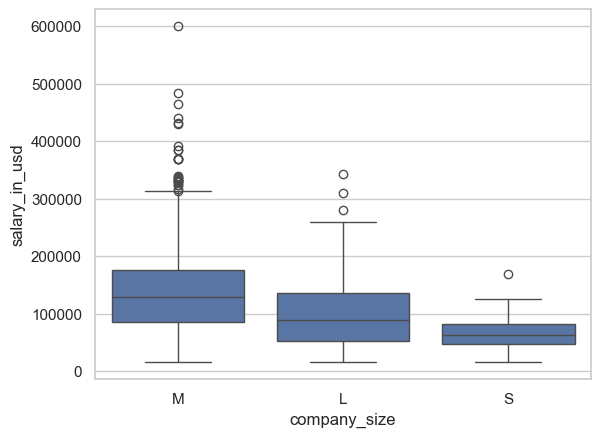

In [60]:
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
#s=small, M=middle, L=large
#vemos que las empresas pequeñas se cobra menos pero entre mediana y grande apenas hay diferencia

In [61]:
df.groupby('company_size').mean('salary_in_usd')

,experience_level,job_title,salary_in_usd,company_location
company_size,,,,
L,2.256250,2.706250,108808.000000,2.400000
M,2.587818,2.187220,136449.264200,2.687220
S,1.882353,2.470588,67125.764706,2.117647


In [62]:
# Pasar la columna de str a int
df['company_size'] = df['company_size'].replace({'S': 1, 'M': 3, 'L': 2})

C:\Users\juanc\AppData\Local\Temp\ipykernel_13408\2694210867.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['company_size'] = df['company_size'].replace({'S': 1, 'M': 3, 'L': 2})
C:\Users\juanc\AppData\Local\Temp\ipykernel_13408\2694210867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['company_size'] = df['company_size'].replace({'S': 1, 'M': 3, 'L': 2})


### **Una vez que hemos limpiado la data vamos a ver la relaciones entre las variables**

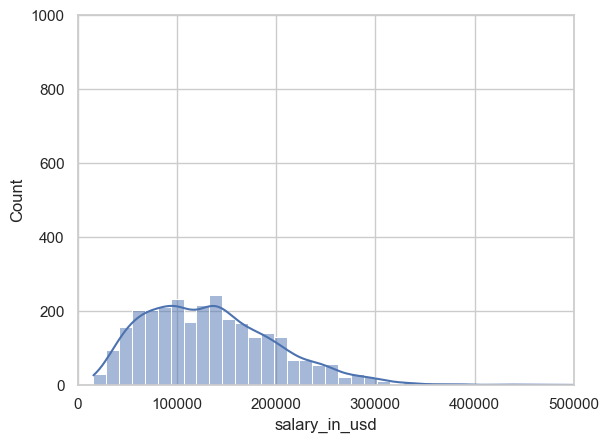

In [65]:
# Crear el histograma con Seaborn
sns.histplot(df['salary_in_usd'], kde=True)

# Ajustar la escala del eje x y el eje y (opcional)
plt.xlim(0, 500000)  # Ajustar los valores según el rango de tus datos
plt.ylim(0, 1000)     # Ajustar los valores según el rango de tus datos

# Mostrar el gráfico
plt.show()

#vemos que la targer salary tiene una distribucion mas o menos normal, por lo que estaria ok para nuestro modelo



In [67]:
df.head()


,experience_level,job_title,salary_in_usd,company_location,company_size
13812,3,2,139500,3,3
9280,2,1,78000,3,3
1984,1,1,64000,3,3
7911,3,4,222200,3,2
6745,2,3,115000,3,2


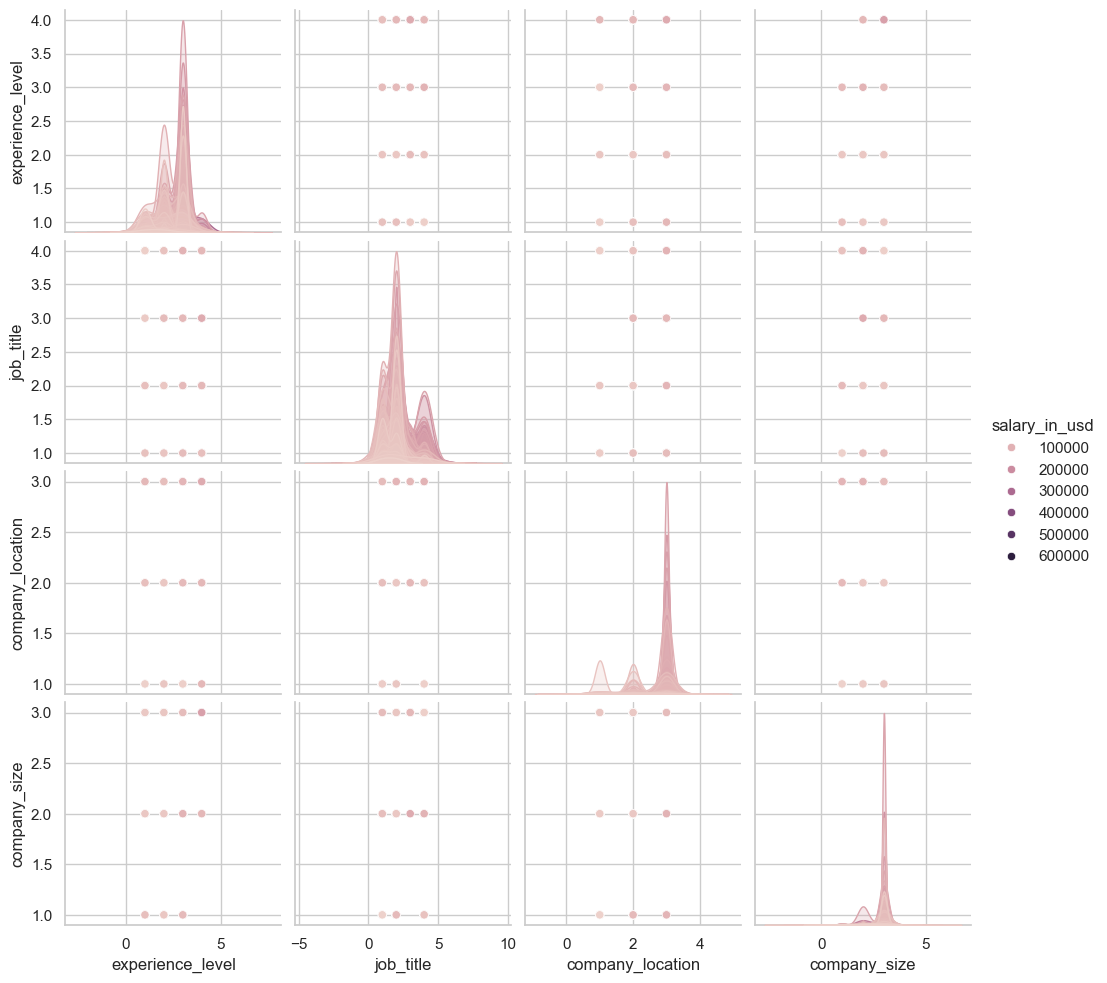

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que df es tu DataFrame

# Seleccionar todas las columnas menos 'salary_in_usd'
columnas_a_incluir = df.columns.drop('salary_in_usd')

# Crear el pairplot con las columnas seleccionadas
sns.pairplot(df[columnas_a_incluir].assign(salary_in_usd=df['salary_in_usd']), hue="salary_in_usd")

# Mostrar el gráfico
plt.show()



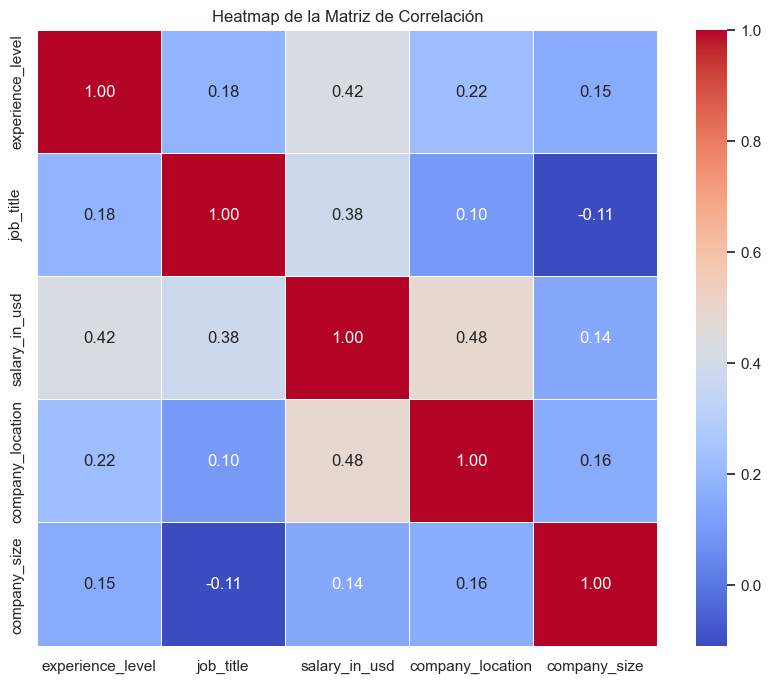

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que df es tu DataFrame

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Configurar la figura
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Configurar título y etiquetas
plt.title('Heatmap de la Matriz de Correlación')

# Mostrar el gráfico
plt.show()



In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2870 entries, 13812 to 16478
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   experience_level  2870 non-null   int64
 1   job_title         2870 non-null   int64
 2   salary_in_usd     2870 non-null   int64
 3   company_location  2870 non-null   int64
 4   company_size      2870 non-null   int64
dtypes: int64(5)
memory usage: 134.5 KB


In [72]:
!pip install xgboost

In [71]:
import xgboost

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import 
from xgboost import XGBRegressor

SyntaxError: invalid syntax (1346443695.py, line 4)

In [75]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['salary_in_usd'])
y = df['salary_in_usd']

In [76]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline

### **XGBoost**

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# XGBoost
from xgboost import XGBRegressor

# Crear y ajustar el modelo XGBoost
xgboost_model = XGBRegressor(n_estimators=100, random_state=0)
xgboost_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train = mean_absolute_error(y, xgboost_model.predict(X))
print(f"Mean Absolute Error on Training Set: {mae_train}")

# Calcular el error absoluto medio en porcentaje
mae_train_percentage = (mae_train / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Percentage): {mae_train_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
xgboost_mae_scores = -cross_val_score(xgboost_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv = xgboost_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation: {mean_mae_cv}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_percentage = (mean_mae_cv / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Percentage): {mean_mae_cv_percentage:.2f}%")



Mean Absolute Error on Training Set: 36591.279923304115
Mean Absolute Error on Training Set (Percentage): 27.29%
Mean Absolute Error with Cross Validation: 38413.7296766115
Mean Absolute Error with Cross Validation (Percentage): 28.65%


### **RandomForest**

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_rf = mean_absolute_error(y, rf_model.predict(X))
print(f"Mean Absolute Error on Training Set (Random Forest): {mae_train_rf}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_rf_percentage = (mae_train_rf / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Random Forest, Percentage): {mae_train_rf_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
rf_mae_scores = -cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_rf = rf_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Random Forest): {mean_mae_cv_rf}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_rf_percentage = (mean_mae_cv_rf / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Random Forest, Percentage): {mean_mae_cv_rf_percentage:.2f}%")



Mean Absolute Error on Training Set (Random Forest): 36682.29595001044
Mean Absolute Error on Training Set (Random Forest, Percentage): 27.36%
Mean Absolute Error with Cross Validation (Random Forest): 38487.53065473596
Mean Absolute Error with Cross Validation (Random Forest, Percentage): 28.70%


### **Regresion Lineal**

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear y ajustar el modelo de regresión lineal
linear_model = LinearRegression()
linear_model.fit(X, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear = mean_absolute_error(y, linear_model.predict(X))
print(f"Mean Absolute Error on Training Set (Linear Regression): {mae_train_linear}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_percentage = (mae_train_linear / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Linear Regression, Percentage): {mae_train_linear_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_mae_scores = -cross_val_score(linear_model, X, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear = linear_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Linear Regression): {mean_mae_cv_linear}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_percentage = (mean_mae_cv_linear / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Linear Regression, Percentage): {mean_mae_cv_linear_percentage:.2f}%")


Mean Absolute Error on Training Set (Linear Regression): 37912.00882400524
Mean Absolute Error on Training Set (Linear Regression, Percentage): 28.27%
Mean Absolute Error with Cross Validation (Linear Regression): 38163.1645226314
Mean Absolute Error with Cross Validation (Linear Regression, Percentage): 28.46%


### **Polinomica 2**

In [80]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear características polinómicas de grado 2
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar un modelo de regresión lineal
linear_model_poly_degree_2 = LinearRegression()
linear_model_poly_degree_2.fit(X_poly, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear_poly_degree_2 = mean_absolute_error(y, linear_model_poly_degree_2.predict(X_poly))
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): {mae_train_linear_poly_degree_2}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_poly_degree_2_percentage = (mae_train_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): {mae_train_linear_poly_degree_2_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_poly_mae_scores_degree_2 = -cross_val_score(linear_model_poly_degree_2, X_poly, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear_poly_degree_2 = linear_poly_mae_scores_degree_2.mean()
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): {mean_mae_cv_linear_poly_degree_2}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_poly_degree_2_percentage = (mean_mae_cv_linear_poly_degree_2 / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): {mean_mae_cv_linear_poly_degree_2_percentage:.2f}%")


Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2): 37613.29089387806
Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 2, Percentage): 28.05%
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2): 38425.782104386984
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 2, Percentage): 28.66%


### **Polinomica 3**

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Crear características polinómicas de grado 3
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Crear y ajustar un modelo de regresión lineal
linear_model_poly = LinearRegression()
linear_model_poly.fit(X_poly, y)

# Calcular el error absoluto medio en el conjunto de entrenamiento
mae_train_linear_poly = mean_absolute_error(y, linear_model_poly.predict(X_poly))
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3): {mae_train_linear_poly}")

# Calcular el error absoluto medio en porcentaje en el conjunto de entrenamiento
mae_train_linear_poly_percentage = (mae_train_linear_poly / y.mean()) * 100
print(f"Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3, Percentage): {mae_train_linear_poly_percentage:.2f}%")

# Validación cruzada para evaluar el modelo
linear_poly_mae_scores = -cross_val_score(linear_model_poly, X_poly, y, cv=10, scoring='neg_mean_absolute_error')
mean_mae_cv_linear_poly = linear_poly_mae_scores.mean()
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3): {mean_mae_cv_linear_poly}")

# Calcular el MAE en porcentaje para validación cruzada
mean_mae_cv_linear_poly_percentage = (mean_mae_cv_linear_poly / y.mean()) * 100
print(f"Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3, Percentage): {mean_mae_cv_linear_poly_percentage:.2f}%")



Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3): 37178.565648215306
Mean Absolute Error on Training Set (Polynomial Linear Regression - Degree 3, Percentage): 27.73%
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3): 38407.54653001299
Mean Absolute Error with Cross Validation (Polynomial Linear Regression - Degree 3, Percentage): 28.64%
